In [1]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:

df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df = df.dropna()

In [6]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


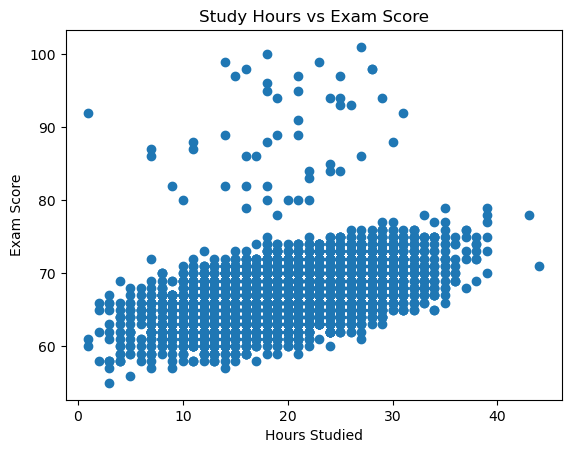

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
X = df[['Hours_Studied']]
y = df['Exam_Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.5292420695261244
MSE: 12.351733799445533
R² Score: 0.20513060832466712


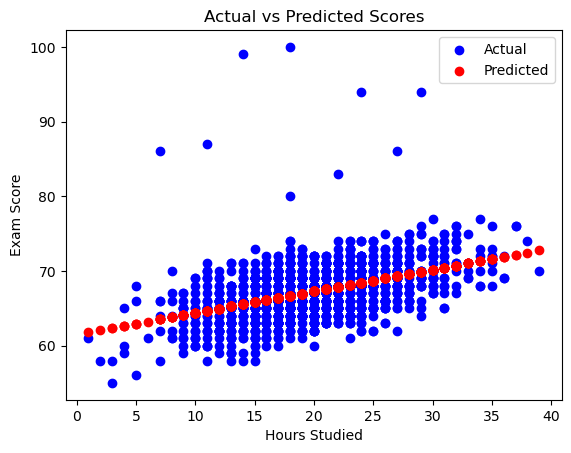

In [12]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Actual vs Predicted Scores')
plt.show()


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)
print("MAE (Polynomial):", mean_absolute_error(y_test, y_poly_pred))
print("MSE (Polynomial):", mean_squared_error(y_test, y_poly_pred))
print("R² Score (Polynomial):", r2_score(y_test, y_poly_pred))


MAE (Polynomial): 2.5285609417656434
MSE (Polynomial): 12.352544212816403
R² Score (Polynomial): 0.20507845590675


In [21]:
print(df.dtypes)


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

object_cols = df_encoded.select_dtypes(include='object').columns

for col in object_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [19]:
X = df_encoded[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Motivation_Level', 'Previous_Scores']]
y = df_encoded['Exam_Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.4174903176127271
MSE: 6.499201063933493
R² Score: 0.5817578260716407


In [20]:
features = X.columns
coefficients = model.coef_

for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.2f}")

Hours_Studied: 0.29
Sleep_Hours: -0.03
Attendance: 0.20
Motivation_Level: -0.18
Previous_Scores: 0.05
